In [ ]:
 !pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 12.0 MB/s eta 0:00:00


In [ ]:
!pip install py3Dmol

from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol
from google.colab import files

# Example molecule
smiles = 'COc1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3)CC2)cc(OC)c1OC'
mol = Chem.MolFromSmiles(smiles)

# Add Hydrogens and Generate 3D Conformer
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol, randomSeed=42)

# Visualize using py3Dmol
mol_block = Chem.MolToMolBlock(mol)
viewer = py3Dmol.view(width=400, height=400)
viewer.addModel(mol_block, 'mol')
viewer.setStyle({'stick': {}})
viewer.zoomTo()

# Show the viewer
viewer.show()



3Dmol.js failed to load for some reason. Please check your browser console for error messages.

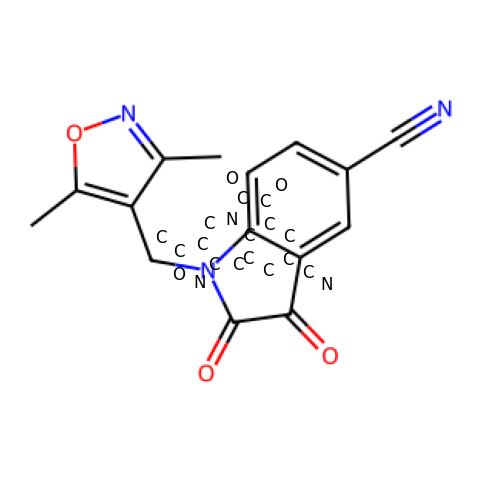

In [ ]:
!pip install rdkit-pypi matplotlib

from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

# Example molecule
smiles = 'Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21	'
mol = Chem.MolFromSmiles(smiles)

# Generate 2D coordinates for the molecule
AllChem.Compute2DCoords(mol)

# Create a 2D image of the molecule
img = Draw.MolToImage(mol, size=(300, 300))

# Set up the plot
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')  # Turn off the axis

# Adding labels for each atom
for atom in mol.GetAtoms():
    atom_idx = atom.GetIdx()  # Get atom index
    atom_label = atom.GetSymbol()  # Get atom symbol (e.g., C, O)

    # Get the atom's coordinates
    coords = mol.GetConformer().GetAtomPosition(atom_idx)

    # Add label to the image
    plt.text(coords.x * 10 + 150, coords.y * 10 + 150, atom_label,
             fontsize=12, ha='center', va='center', color='black')

# Show the labeled image
plt.show()


In [ ]:
# Save the 3D model to a PDB file
pdb_file_path = 'ethanol.pdb'  # Specify the file name and format
with open(pdb_file_path, 'w') as f:
    f.write(Chem.MolToPDBBlock(mol))  # Convert the molecule to PDB format

# Save the 3D model to a MOL file (optional)
mol_file_path = 'ethanol.mol'  # Specify the file name and format
with open(mol_file_path, 'w') as f:
    f.write(Chem.MolToMolBlock(mol))  # Convert the molecule to MOL format

# Optional: Display a message
print(f"3D model saved as {pdb_file_path} and {mol_file_path}.")


3D model saved as ethanol.pdb and ethanol.mol.


In [ ]:
from google.colab import files

# Download the saved PDB file
files.download(pdb_file_path)

# Download the saved MOL file (if created)
files.download(mol_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>